In [5]:
from radd import build, fit, vis

## Dir

In [6]:
#%mkdir /home/kyle/Dropbox/ELife/ReA_Idx/
%cd /home/kyle/Dropbox/ELife/ReA_Idx/

/home/kyle/Dropbox/ELife/ReA_Idx


## Prepare Data/Params

In [7]:
data = redf_store['redata']
binits = {k: v for k,v in redf_store['rebsl_boot_popt'].items()}
binits['ssv']=-abs(binits['ssv'])
pinits = {k: v for k,v in redf_store['repnl_boot_popt'].items()}
inits = {k: np.mean([binits[k], pinits[k]]) for k in binits.keys()}

## optimize

In [8]:
m = build.Model(data=data, inits=inits, fit_on='subjects', depends_on={'a': 'Cond'}, prepare=1)


                  Model is prepared to fit on subjects reactive data,
                  allowing Boundary Height to vary across
                  levels of Cond (bsl, pnl)  


                  I wish you a slippery gradient, and a happy Nature paper 

 


In [9]:
popt, yhat = m.optimize(xtol=.001, ftol=.001, ntrials=10000, maxfev=20000)

Optimization terminated successfully.
         Current function value: 0.239029
         Iterations: 23
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 0.091033
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.120975
         Iterations: 122
         Function evaluations: 319
Optimization terminated successfully.
         Current function value: 0.077488
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.067551
         Iterations: 353
         Function evaluations: 893
Optimization terminated successfully.
         Current function value: 0.020211
         Iterations: 39
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 0.091139
         Iterations: 20
         Function evaluations: 45
Optimization terminated succes

/home/kyle/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


##visualize fits

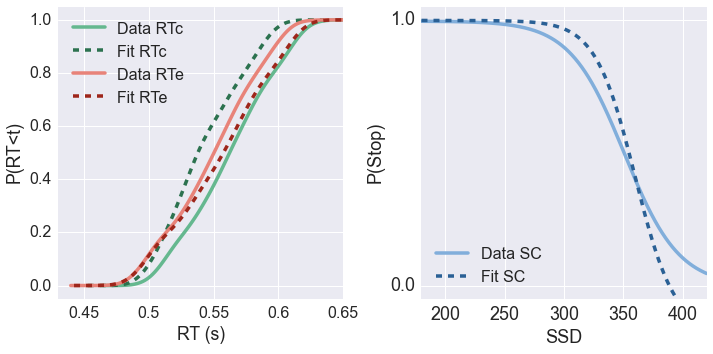

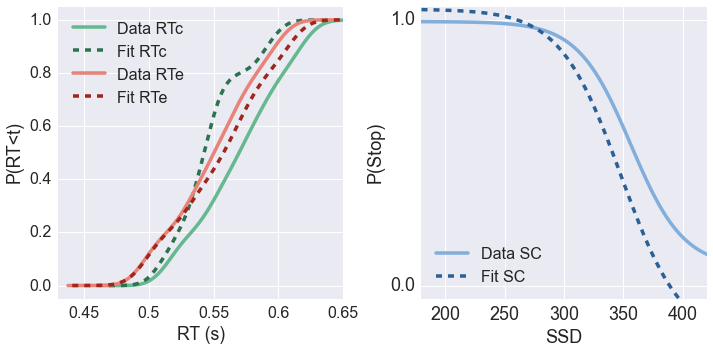

In [10]:
y = build.append_eq(m.y)
yhat = build.append_eq(m.yhat)
for i in range(2):
      vis.plot_fits(y[i], yhat[i], plot_acc=True, savestr=m.labels[i])